In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Rain in australia 

This dataset contains about 10 years of daily weather observations from many locations across Australia. We are going to use this dataset to predict whether or not it will rain tomorrow by training classification models. link: [dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package "Title")

In [3]:
data = pd.read_csv('weatherAUS.csv', sep=',')

Kolumny
- Date
- Location
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir
- WindGustSpeed
- WindDir9am
- WindDir3pm
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm
- RainToday
- RainTomorrow

Delete rows with duplicated values

In [4]:
data = data.dropna(how='any')
if data.duplicated().any():
    data.drop_duplicates(inplace=True)

print(data.shape)
print(data.isnull().sum())

(56420, 23)
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


delete rows with missing values

In [5]:

data = data.dropna()
print(data.shape)

(56420, 23)


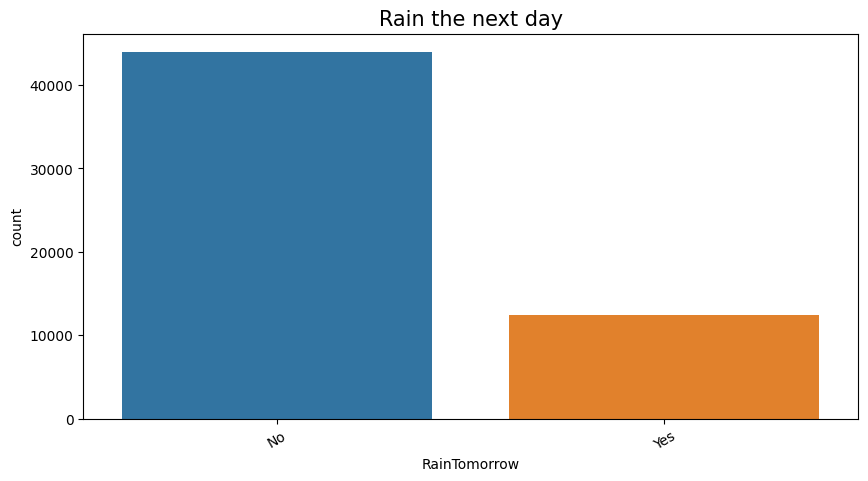

In [6]:
plt.figure(figsize=(10,5))
plt.title('Rain the next day',fontsize=15)
sns.countplot(x=data['RainTomorrow'],data=data)
plt.xticks(rotation=30)
plt.show()

The graphs show us the amount of false and true news, the scale is insignificant (almost 1:3), so the database is reliable

In [7]:
res_data = data.drop(["WindGustDir", "Location", "WindDir9am","WindDir3pm",'Sunshine','Evaporation','Cloud9am', 'Cloud3pm'], axis=1)

for i,row in res_data.iterrows():
    if row['RainToday']=='No':
        #dataframe.at[index,'column-name']='new value'
        res_data.at[i,'RainToday'] = 0
    elif row['RainToday']=='Yes':
        #at index i and column name
        res_data.at[i,'RainToday'] = 1
    #now seperately check other column still need elif cuz there are null variables
    if row['RainTomorrow']=='No':
        res_data.at[i, 'RainTomorrow'] = 0
    elif row['RainTomorrow']=='Yes':
        res_data.at[i, 'RainTomorrow'] = 1

In [8]:
X = res_data.drop(['RainTomorrow', 'Date'], axis=1) 
y = res_data['RainTomorrow'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=278840)

[Text(0.6857664353819182, 0.984375, 'x[7] <= 69.5\ngini = 0.343\nsamples = 39494\nvalue = [30795, 8699]'),
 Text(0.4523893018828638, 0.953125, 'x[7] <= 53.5\ngini = 0.242\nsamples = 33251\nvalue = [28561, 4690]'),
 Text(0.24165156723104586, 0.921875, 'x[3] <= 56.5\ngini = 0.158\nsamples = 22156\nvalue = [20242, 1914]'),
 Text(0.13741389642263657, 0.890625, 'x[7] <= 42.5\ngini = 0.121\nsamples = 19596\nvalue = [18325, 1271]'),
 Text(0.038942563146983834, 0.859375, 'x[9] <= 1007.65\ngini = 0.082\nsamples = 11975\nvalue = [11459, 516]'),
 Text(0.012396191011968262, 0.828125, 'x[7] <= 25.5\ngini = 0.2\nsamples = 1144\nvalue = [1015, 129]'),
 Text(0.006301432829881895, 0.796875, 'x[3] <= 53.0\ngini = 0.092\nsamples = 576\nvalue = [548, 28]'),
 Text(0.004479951701592681, 0.765625, 'x[4] <= 34.0\ngini = 0.07\nsamples = 493\nvalue = [475, 18]'),
 Text(0.0035263325798141473, 0.734375, 'x[8] <= 1013.75\ngini = 0.067\nsamples = 491\nvalue = [474, 17]'),
 Text(0.002277708981514196, 0.703125, 'x[10

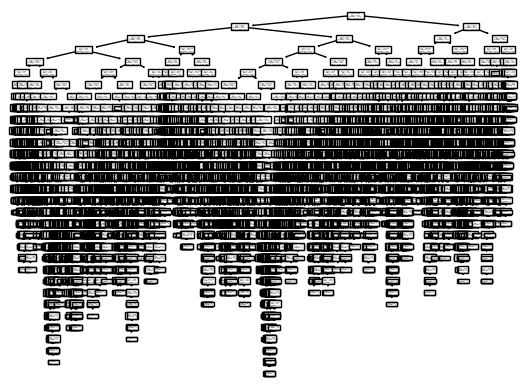

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

Accuracy of the tree classifier:

In [10]:
clf.score(X_test, y_test)

0.7848280751506558

Confusion matrix: 

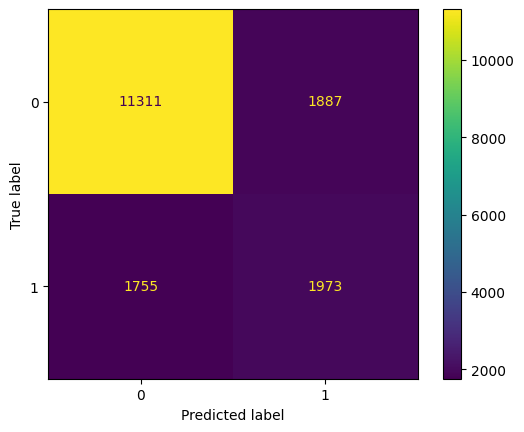

In [11]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Bayes classifier:

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8111780692425854

Confusion matrix: 

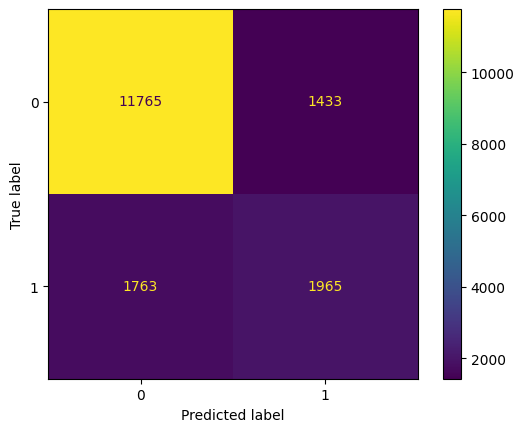

In [13]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

k nearest neighbors classifier with 3 neighbors:

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8296112489660876

Confusion matrix:

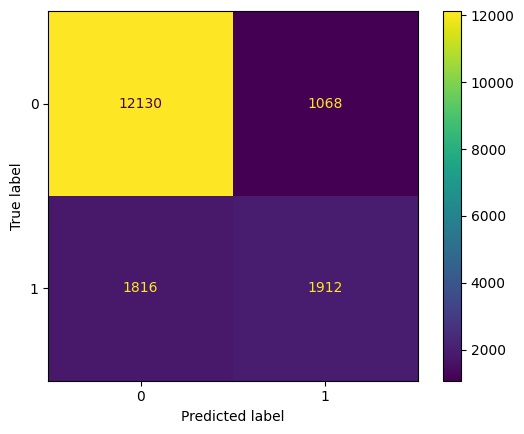

In [15]:
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

k nearest neighbors classifier with 5 neighbors:

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8381188703769349

confusion matrix:

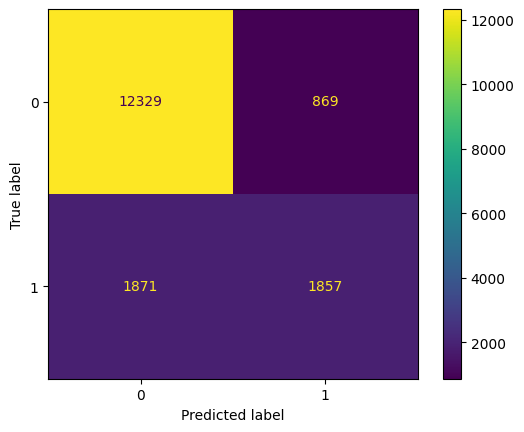

In [17]:
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

splitting the data into training and testing sets

In [18]:
X = res_data.drop(['RainTomorrow', 'Date'], axis=1) 
y = res_data['RainTomorrow'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=278823)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

creating the neural network

In [19]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=250, verbose=0, validation_data=(X_test, y_test))

accuracy of the neural network

In [22]:
predictions_train = model.predict(X_train).round()
print(accuracy_score(predictions_train, y_train))

predictions_test = model.predict(X_test).round()
print(accuracy_score(predictions_test, y_test))

1235/1235 [==============================] - 2s 1ms/step
0.7782194763761584
529/529 [==============================] - 1s 2ms/step
0.7832919768403639


confusion matrix

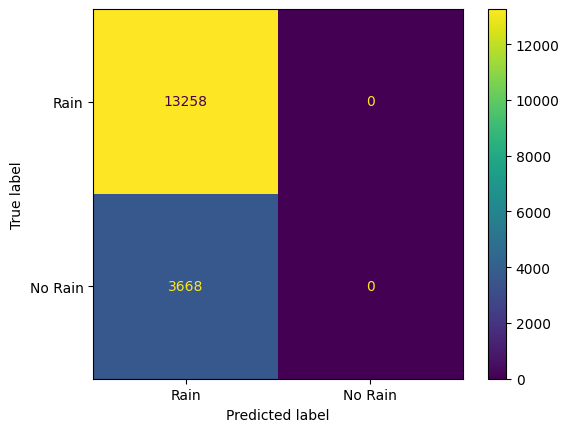

In [23]:
cm = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rain', 'No Rain'])
disp.plot()

plotting the model loss

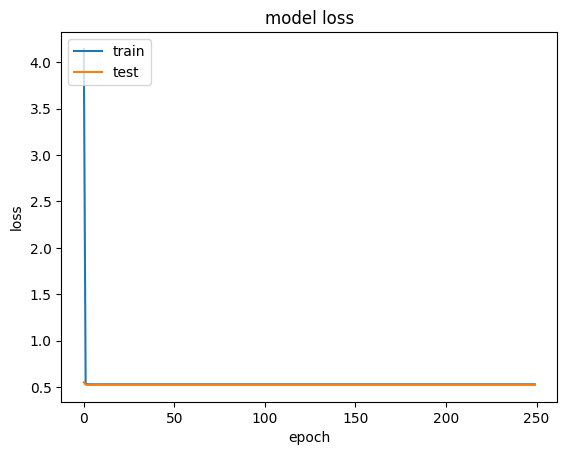

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Preprocessing

removing columns with all 0 values

In [25]:
zero_cols = [col for col in res_data.columns if (res_data[col] == 0).all()]

print(zero_cols)
print(res_data.shape)

[]
(56420, 15)


In [26]:
res_data = res_data.drop(zero_cols, axis=1)
res_data = res_data.drop(['Date'], axis=1)
print(res_data.shape)

(56420, 14)


normalizing the data into a range of 0 to 1

In [27]:
scaler = MinMaxScaler()

scaler.fit(res_data)

res_data_scaled = scaler.transform(res_data)

res_data = pd.DataFrame(res_data_scaled, columns=res_data.columns)

res_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.645669,0.706818,0.0,0.339130,0.061538,0.243243,0.20,0.13,0.430718,0.441748,0.680798,0.700472,0.0,0.0
1,0.658793,0.563636,0.0,0.243478,0.261538,0.229730,0.30,0.08,0.540902,0.566343,0.523691,0.549528,0.0,0.0
2,0.685039,0.761364,0.0,0.321739,0.430769,0.175676,0.42,0.22,0.530885,0.519417,0.733167,0.735849,0.0,0.0
3,0.750656,0.779545,0.0,0.191304,0.061538,0.054054,0.37,0.22,0.537563,0.517799,0.743142,0.752358,0.0,0.0
4,0.811024,0.838636,0.0,0.226087,0.230769,0.148649,0.19,0.15,0.504174,0.490291,0.855362,0.799528,0.0,0.0


using PCA to reduce the number of features

In [28]:
X = res_data.drop(['RainTomorrow'], axis=1) 
y = res_data['RainTomorrow'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=278823)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

creating the neural network

In [29]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=250, verbose=0, validation_data=(X_test, y_test))

accuracy of the neural network

In [32]:
predictions_train = model.predict(X_train).round()
print(accuracy_score(predictions_train, y_train))

predictions_test = model.predict(X_test).round()
print(accuracy_score(predictions_test, y_test))

1235/1235 [==============================] - 2s 1ms/step
0.8534460930774295
529/529 [==============================] - 1s 1ms/step
0.8561975658749852


confusion matrix

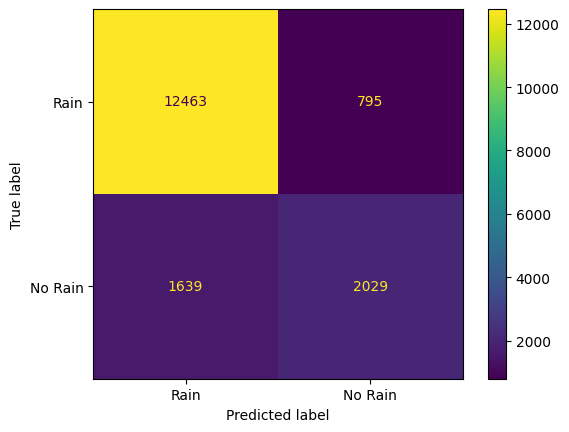

In [33]:
cm = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rain', 'No Rain'])
disp.plot()

plotting the model loss

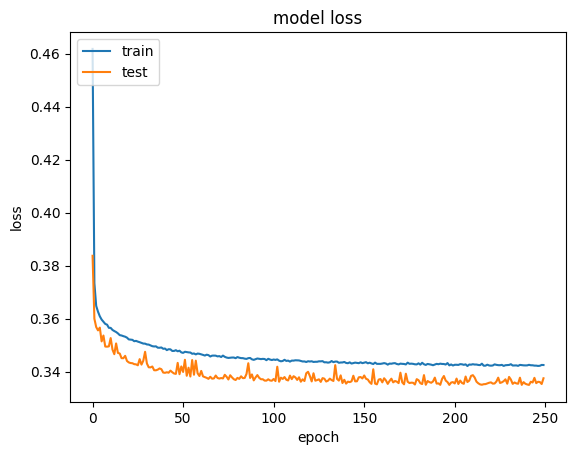

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

tree classifier

[Text(0.6737990237122152, 0.9857142857142858, 'x[7] <= 0.695\ngini = 0.345\nsamples = 39494\nvalue = [30735, 8759]'),
 Text(0.43975663431741563, 0.9571428571428572, 'x[7] <= 0.535\ngini = 0.241\nsamples = 33180\nvalue = [28520, 4660]'),
 Text(0.23964973107470428, 0.9285714285714286, 'x[3] <= 0.413\ngini = 0.157\nsamples = 22207\nvalue = [20301, 1906]'),
 Text(0.14006035305517314, 0.9, 'x[7] <= 0.425\ngini = 0.122\nsamples = 19646\nvalue = [18363, 1283]'),
 Text(0.0454350313940252, 0.8714285714285714, 'x[9] <= 0.494\ngini = 0.081\nsamples = 12053\nvalue = [11543, 510]'),
 Text(0.015243698378913833, 0.8428571428571429, 'x[7] <= 0.275\ngini = 0.193\nsamples = 1149\nvalue = [1025, 124]'),
 Text(0.008165669384094347, 0.8142857142857143, 'x[6] <= 0.815\ngini = 0.097\nsamples = 665\nvalue = [631, 34]'),
 Text(0.006993025715165389, 0.7857142857142857, 'x[4] <= 0.492\ngini = 0.09\nsamples = 658\nvalue = [627, 31]'),
 Text(0.005333119151841291, 0.7571428571428571, 'x[3] <= 0.348\ngini = 0.082\ns

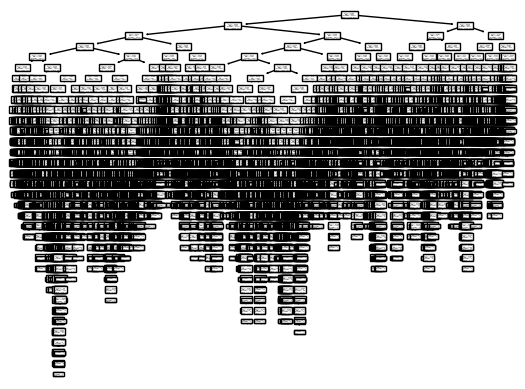

In [35]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

accuracy of the tree classifier

In [36]:
clf.score(X_test, y_test)

0.7906179841663713

confusion matrix

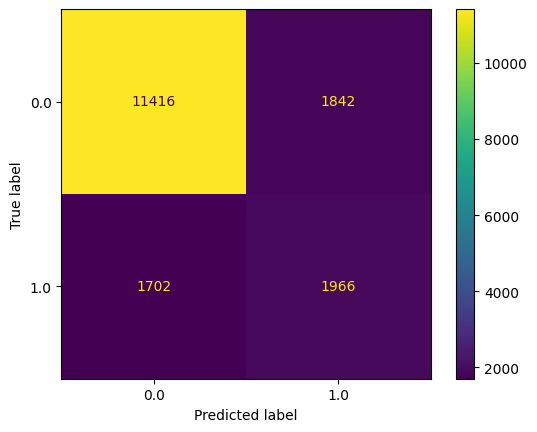

In [37]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

bayes classifier

In [38]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8112371499468274

confusion matrix

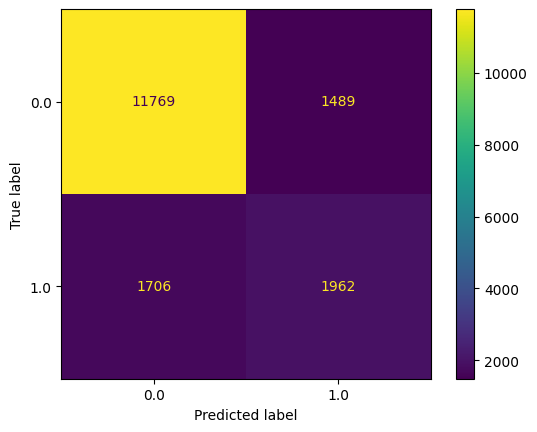

In [39]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

k nearest neighbors classifier with 3 neighbors

In [40]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8298475717830557

confusion matrix

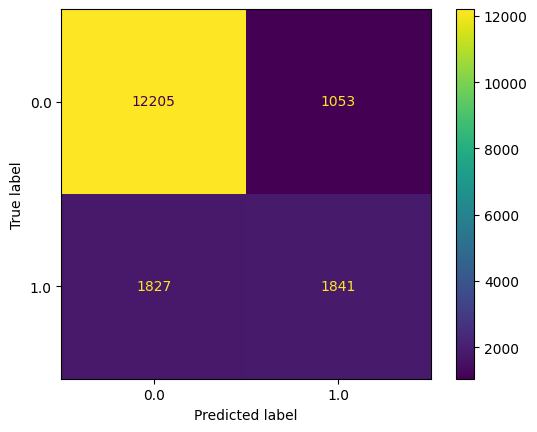

In [41]:
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

k nearest neighbors classifier with 5 neighbors

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.837291740517547

confusion matrix:

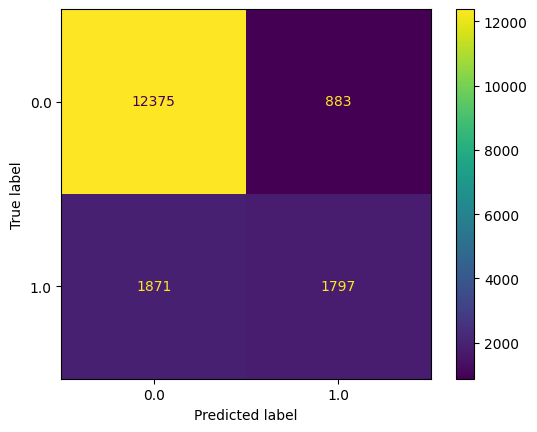

In [43]:
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

|    Classifier       | raw data | preprocessed data |
|---------------------|----------|-------------------|
| Decision Tree       |   78.6%  |       79.0%       |
| Bayes               |   81.1%  |       81.1%       |
| 3 nearest neighbours|   83.0%  |       83.0%       |
| 5 nearest neighbours|   83.8%  |       83.7%       |
| Neural network      |   84.7%  |       85.3%       |

Preprocessed data in increased the accuracy but in a small amount. The best classifier turned out to be the neural network with preprocessed data (85.3%).